# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [16]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
matplotlib.use('Agg')
%matplotlib inline

## Carga del Conjunto de Datos



In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# se verifica la información en set de dato boton
print(boston)


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [6]:
print(boston['DESCR'])   # descripción del dataset
boston['data']           # matriz con los datos de entrada (atributos)
boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [7]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. Boston es un set de dato que está incluido en sklearn y ofrece valores medios de los valores de inmuebles en Boston a partir de diferentes caracteristicas.



2. La variable objetivo es MEDV. Median value of owner-occupied homes in $1000's. 
Esta varible indica el precio promedio las viviendas ocupadas por sus propietarios expresadas en factor de 1000. Es decir que indica el precio de los inmuebles.

3. los atributos disponibles son los siguientes.
 
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
 
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

Los atributos que estimamos serán los mas determinantes son los siguientes.

CRIM ,CHAS, RM,AGE, DIS,RAD,TAX

5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

A priori se observa la variables CRIM (crimenes por capita en la ciudad) estaría indicando que se trata o no de un lugar seguro para vivir. Este atributo hace que la vivienda portadora de una categoría social pueda generar una respuesta negativa y se le atribuya como negativa (inacepatable o inforiores)
**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

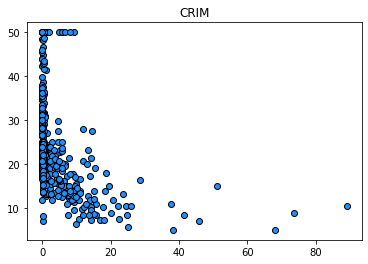

In [17]:
#2.1

feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

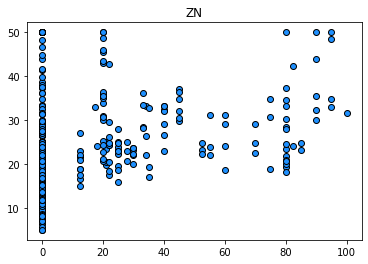

In [18]:
feature = 'ZN'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

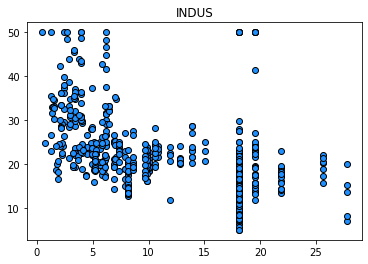

In [19]:
feature = 'INDUS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

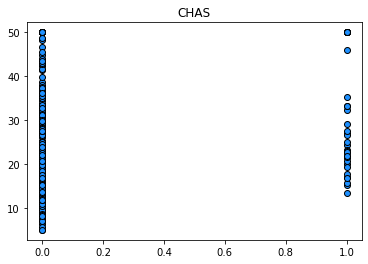

In [20]:
feature = 'CHAS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

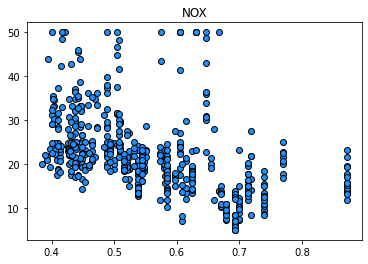

In [21]:
feature = 'NOX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

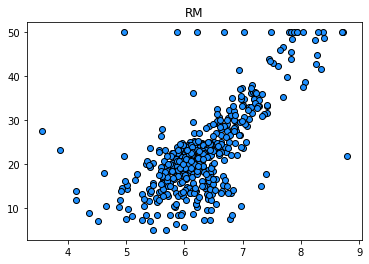

In [22]:
feature = 'RM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

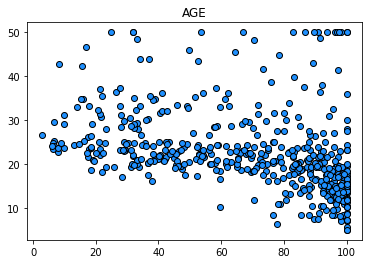

In [23]:
feature = 'AGE'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

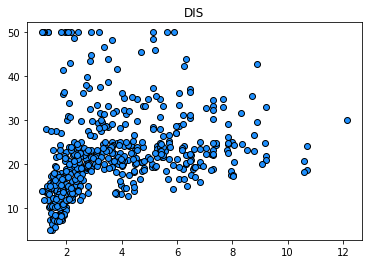

In [24]:
feature = 'DIS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

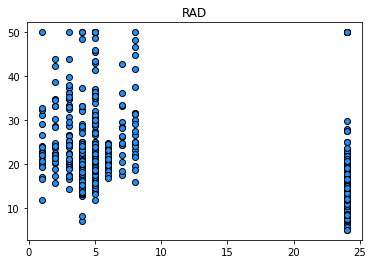

In [25]:
feature = 'RAD'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

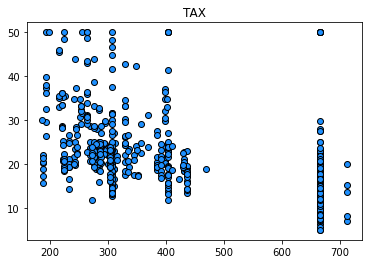

In [26]:
feature = 'TAX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

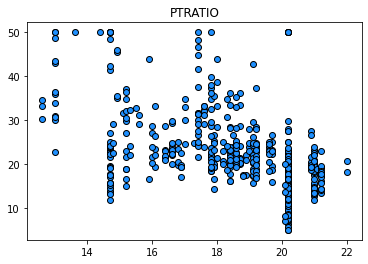

In [27]:
feature = 'PTRATIO'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

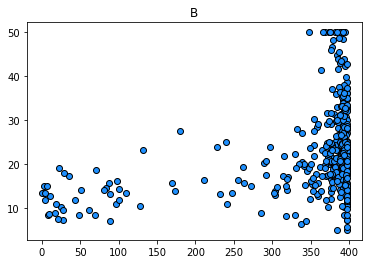

In [28]:
feature = 'B'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

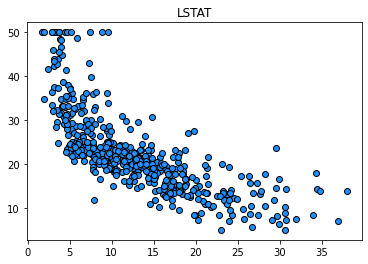

In [29]:
feature = 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

2.2- Un análisis preliminar de los gráficos obtenidos anteriormente permite establecer que los atributo que tienen un clara tendencia y que podrían ser relevantes para la predicción son: RM , AGE, DIS y LSTAT.

2.3- A continuación se listan los atibutos en orde de importancia.
1) RM
2) AGE
3) LSTAT
4) DIS


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

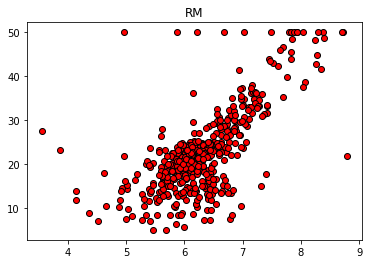

In [30]:
feature = 'RM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="red", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

In [143]:
#Se puede observar a simple vista que el modelo tendrá un error muy alto para el algoritmo de regresión lineal.

In [31]:
# 1. Resolver acá. Ayuda:
feature = 'RM'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [145]:
#Instanciar y entrenar acá.

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train_f,y_train) #Entrena el algoritmo 

LinearRegression()

In [149]:
# 3. Predecir y evaluar acá.

In [35]:
y_test_pred = lm.predict(X_test_f)

In [36]:
y_train_pred = lm.predict(X_train_f)

In [37]:

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
score=lm.score(X_train_f,y_train)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')
print(f'Precision del modelo: {score:f}')

Train error: 42.820479
Test error: 46.907352
Precision del modelo: 0.497080


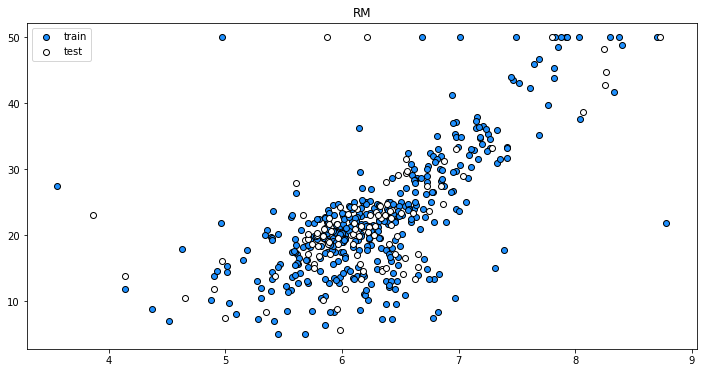

In [38]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

Text(0, 0.5, 'Valor medio')

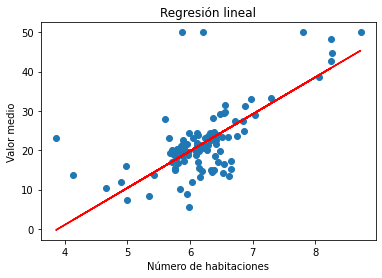

In [39]:
plt.scatter(X_test_f,y_test)
plt.plot(X_test_f,y_test_pred,color='red')
plt.title('Regresión lineal')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')

3.5 Analizando el resultado obtenido se puede observar que el modelo predijo de forma correcta la tendencia de los datos, aunque es incompleto para predecir los valores dicho modelo. 

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [155]:
# 1. Resolver acá.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


X_train_fp = X_train[:, selector]
X_test_fp = X_test[:, selector]
degree = 10  # seleccio de un grado arbitrio de polinomio
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature 
model = make_pipeline(pf, lr)

In [41]:
model.fit(X_train_fp, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [42]:
y_train_pred = model.predict(X_train_fp)
y_test_pred = model.predict(X_test_fp)

In [43]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
score1=lm.score(X_train_fp,y_train)
print(f'Train error: {train_error:0.5}')
print(f'Test error: {test_error:0.3}')
print(f'Precision del modelo: {score1:f}')

Train error: 32.8
Test error: 45.0
Precision del modelo: 0.497080


In [160]:
# 2. Graficar curvas de error acá.

In [44]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)

    model.fit(X_train_fp, y_train)
   # model.fit(X_train_fp, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fp)
    y_test_pred = model.predict(X_test_fp)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [45]:
train_errors, test_errors

([85.1437202235075,
  42.820478941727515,
  37.74552897028126,
  36.395658757671164,
  34.80844625691345,
  33.13112157195784,
  33.13011641558405,
  33.06035876480318,
  33.06035722332969,
  32.85494394584421],
 [81.58231743908232,
  46.907351627395315,
  39.79473116372663,
  39.82576208821406,
  41.55392567547212,
  41.03828857087715,
  41.00917694042084,
  42.39411081753549,
  42.39919181671428,
  46.042803163109674])

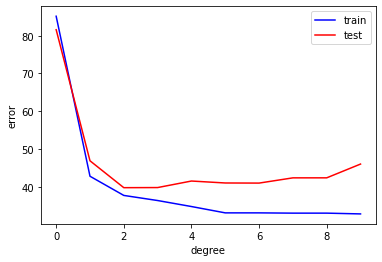

In [46]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Se observa que el punto donde el error es meno es el grado 2  del polinomio, luego comienza a observarse pequeños sobre ajustes en el modelo.

In [47]:
# 4.4
X_train_fp1 = X_train[:, selector]
X_test_fp1 = X_test[:, selector]
degree = 2
pf = PolynomialFeatures(degree)#

lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature

model = make_pipeline(pf, lr)


model.fit(X_train_fp1, y_train)

y_train_pred = model.predict(X_train_fp1)
y_test_pred = model.predict(X_test_fp1)


In [48]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)


score2=lm.score(X_train_fp1,y_train)
print(f'Train error: {train_error:0.5}')
print(f'Test error: {test_error:0.3}')
print(f'Precision del modelo: {score2:f}')

Train error: 37.746
Test error: 39.8
Precision del modelo: 0.497080


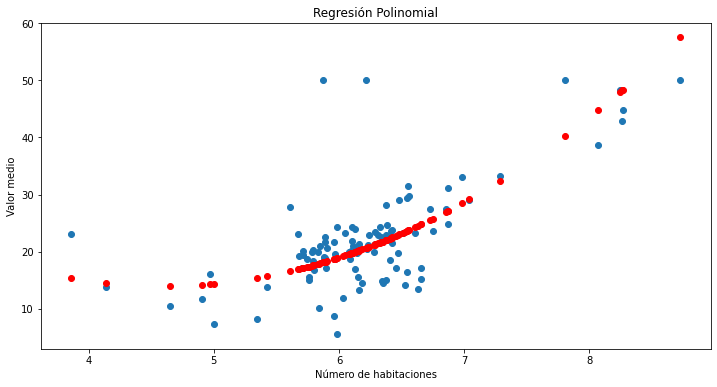

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(X_test_f,y_test)
plt.scatter(X_test_f,y_test_pred,color='red')

plt.title('Regresión Polinomial')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')


plt.show()


4.5. Interpretación del grafico: Las líneas rojas serían nuestro modelo y los punto azules los datos de entrenamiento. Como objetivo se plantea disminuir el error es decir la distancia a nuestra curva .  Se observa que buena parte de los datos tienen un comportamiento correcto.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [50]:
# 1. Resolver acá. Ayuda (con dos atributos):
#Atributos seleccionados para este analisis.
#RM. AGE Y LSTM.
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'AGE')| (boston['feature_names'] == 'LSTM')
X_train_fs1 = X_train[:,selector]
X_test_fs1 = X_test[:,selector]
X_train_fs1.shape, X_test_fs1.shape

((404, 2), (102, 2))

In [51]:
# 2. Resolver acá.
#regresión lineal con mas de dos atributos.
lm = LinearRegression()
lm.fit(X_train_fs1,y_train) #Entrena el algoritmo 

LinearRegression()

In [52]:
y_test_pred = lm.predict(X_test_fs1)
y_train_pred = lm.predict(X_train_fs1)

In [53]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
score3=lm.score(X_train_fs1,y_train)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')
print(f'Precision del modelo: {score3:f}')

Train error: 38.042240
Test error: 46.366983
Precision del modelo: 0.553200


In [54]:
#regresión polinominal con mas de dos atributos.
X_train_fp2 = X_train[:,selector]
X_test_fp2 = X_test[:,selector]

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature

model = make_pipeline(pf, lr)


model.fit(X_train_fp2, y_train)

y_train_pred = model.predict(X_train_fp2)
y_test_pred = model.predict(X_test_fp2)


In [55]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
score4=lm.score(X_train_fp2,y_train)
print(f'Train error: {train_error:0.5}')
print(f'Test error: {test_error:0.3}')
print(f'Precision del modelo: {score4:f}')

Train error: 29.872
Test error: 39.6
Precision del modelo: 0.553200


Al agregar las columnas LSTLS y AGE podemos ver como nuestro modelo se fue optimizando. Esto es debido al aumento de la cantidad de datos que nos permitieron obtener otras relaciones con la variable que deseamos predecir.  Claramente al inyectarle mayor información al modelo obtenemos resultados con mejorar sustanciables.